LDA

In [1]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np
import pandas as pd
from spacy.lang.es.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
# %matplotlib inline


/home/kevin/.pyenv/versions/3.9.15/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("mrm8488/CHISTES_spanish_jokes")
dataset['train'][0]

#convierto a pandas conservando el nombre de las columnas
df = pd.DataFrame(dataset['train'])

In [3]:
df

,id,text,keywords,funny,category
0,0,"- ¡Rápido, necesitamos sangre!\n- Yo soy 0 pos...",sangre,1,otros
1,1,- ¿Cuál es el mejor portero del mundial? \n- E...,"futbol,porteros",1,otros
2,2,El otro día unas chicas llamarón a mi puerta y...,"dinero,agua",1,otros
3,3,"- Andresito, ¿qué planeta va después de Marte?...",planetas,1,profesiones
4,4,- ¿Por qué Bob Esponja no va al gimnasio? \n- ...,"esponja,gimnasios",1,otros
...,...,...,...,...,...
2414,2414,Una mujer en la consulta del médico.\n-Hola do...,"doctor,ropa",2,profesiones
2415,2415,Error 0094782: No se detecta ningún teclado pu...,"windows,teclado",2,tematicos
2416,2416,Una chica entra a una iglesia con un buen esco...,"escote,pecho,cura",2,tematicos
2417,2417,Un hombre va a hablar con su jefe:\n-Hola veng...,"boda,jefe",2,familia


In [4]:
#@title Set topic modeling algorithm arguments

no_topics = 3 #@param {type:"integer"}
no_top_words = 4 #@param {type:"integer"}
no_top_documents = 3 #@param {type:"integer"}

In [5]:
#creo una lista con las stopwords en español
spanish_stop_words = list(STOP_WORDS)

In [6]:
print(spanish_stop_words)

['hay', 'nosotros', 'quizas', 'tener', 'hacemos', 'había', 'tengo', 'existe', 'solamente', 'estoy', 'vuestra', 'buen', 'aproximadamente', 'cuatro', 'cuantos', 'cuántos', 'aquélla', 'habrá', 'hacer', 'mencionó', 'usais', 'dieron', 'mismo', 'mías', 'diferentes', 'segundo', 'sólo', 'estará', 'cuales', 'queremos', 'quedó', 'cuál', 'estas', 'antes', 'peor', 'final', 'pesar', 'asi', 'hago', 'pudo', 'o', 'sido', 'somos', 'despacio', 'donde', 'llegó', 'buenos', 'tuya', 'dijo', 'anterior', 'junto', 'cuáles', 'aquello', 'partir', 'podría', 'pueda', 'últimas', 'segun', 'dan', 'para', 'hicieron', 'mucha', 'aquéllos', 'llevar', 'encuentra', 'diferente', 'sean', 'realizado', 'ninguna', 'solo', 'toda', 'veces', 'mia', 'su', 'varias', 'excepto', 'bastante', 'casi', 'menos', 'podriamos', 'hacerlo', 'sus', 'usted', 'y', 'consideró', 'podemos', 'cada', 'tanto', 'ningún', 'atras', 'está', 'buenas', 'parece', 'aquéllas', 'delante', 'conocer', 'grandes', 'hubo', 'va', 'tendrán', 'aseguró', 'tenía', 'quien',

In [8]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    '''
    Display the topics generated by the NMF model
    '''
    for topic_idx, topic in enumerate(H):
        print(' ')
        print('Topic %d:' % (topic_idx))
        print(' '.join([ (feature_names[i] + ' (' + str(topic[i].round(2)) + ')')
          for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(str(doc_index) + ". " + documents[doc_index])


In [9]:
#@title Run NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stop_words)

# Fit and transform the tfidf vectorizer
tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Get feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Run NMF
## NMF
nmf_model = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

## Get W and H
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

print('NMF Topics')
display_topics(nmf_H, nmf_W, tfidf_feature_names, df['text'], no_top_words, no_top_documents)
print('--------------')

NMF Topics
 
Topic 0:
hombre (0.95) mujer (0.93) pregunta (0.52) marido (0.48)
1283. Entra un señor a un bar y el camarero le pregunta:
- ¿Qué quiere?
- ¡Que qué quiero!, una casa más grande, tener más dinero, que mi mujer sea más guapa.
- No, hombre, ¿Que qué desea?
- ¡Que qué deseo!, tener una mansión, ser millonario, que mi mujer sea estupenda.
- ¡No hombre! ¿Que qué va a ser?
- ¿Que qué va a ser? 
- Yo prefiero que sea chica pero si es un niño, no me importa.
- ¡No hombre! ¿Que qué va a tomar?
- ¡Ah, hombre, eso se dice antes! ¿Qué hay?
- Pues nada, por aquí, como siempre detrás de la barra...
2289. Era un hombre que la tenía tan grande, tan grande, que en vez de frenillo tenía ABS.
359. ¿Por qué cuando una mujer se comporta como un hombre no puede comportarse como un hombre agradable?
 
Topic 1:
mamá (1.73) hijo (0.54) papá (0.35) niño (0.21)
671. - Mamá, mamá, ¿de donde sale la porcelana?
- De las porceobejas hijo
- ¡Gracias mamá!
- Enga
864. - Mamá, mamá, ¿La abuela es fosforesc

In [10]:
#@title Run LDA

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stop_words)
tf = tf_vectorizer.fit_transform(df['text'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

print("LDA Topics")
display_topics(lda_H, lda_W, tf_feature_names, df['text'], no_top_words, no_top_documents)

LDA Topics
 
Topic 0:
mamá (192.26) jaimito (131.75) pregunta (106.42) años (85.84)
2359. Un inglés, un francés y un español alardean de que su país es el más adelantado en
cuestión de injertos. 
Dice el <strong>inglés</strong>:
- En mi país, nació un niño sin brazos, le hicimos un injerto y ganó cinco veces
consecutivas el campeonato de tenis de Estados Unidos. 
Le contesta el <strong>francés</strong>
- Pues en mi país nació uno sin piernas y al cabo de veinticinco años del injerto
venció 4 veces consecutivas en el tour de Francia. 
Entonces el <strong>español</strong> comenta:
- Eso no es nada, en España nació un niño sin cabeza, le injertamos un melón, le
pusimos bigote y ahora es Presidente.
153. En el museo de historia natural un visitante pregunta al conservador:
-¿Cuántos años tiene este dinosaurio de aquí?
- Setenta millones y treinta y siete años
El visitante se queda impresionado ante la precisión del dato y piensa "este museo debe usar un método muy sofisticado para determin

In [11]:
# cuantas categorias hay
df['category'].value_counts()

category
otros          770
familia        580
sexo           353
animales       229
profesiones    199
regionales     194
tematicos       94
Name: count, dtype: int64

In [12]:
df['category'].value_counts()/df.shape[0]

category
otros          0.318313
familia        0.239768
sexo           0.145928
animales       0.094667
profesiones    0.082265
regionales     0.080198
tematicos      0.038859
Name: count, dtype: float64

Así tenemos 7 categorías, siendo la más común “otros” con un 31,8%.

Exploremos también el tamaño de los chistes.

In [13]:
df['len'] = df['text'].apply(lambda t: len(t))

df['len'].describe()

count    2419.000000
mean      278.677966
std       308.957405
min        31.000000
25%       107.000000
50%       160.000000
75%       314.000000
max      2836.000000
Name: len, dtype: float64

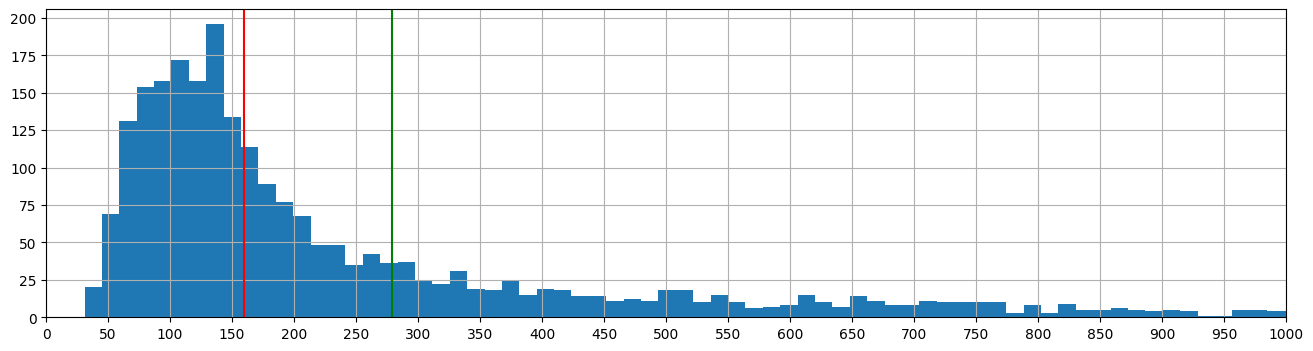

In [14]:
df['len'].hist(bins=200, figsize=(16, 4))

plt.xticks(range(0,2000,50))
plt.xlim((0,1000))
plt.axvline(df['len'].median(), color='r')  # Median in red
plt.axvline(df['len'].mean(), color='g')  # Mean in green

La mitad de los chistes tienen un tamaño inferior a 160 caracteres

Cargaremos el módulo de español en espacios espaciosos e intentaremos obtener la parte del discurso (POS) de cada palabra y otra información.

In [15]:
import spacy
nlp = spacy.load('es_core_news_sm')
nlp

Intentemos obtener un chiste aleatorio y procesarlo con espacio.

In [16]:
random_joke = df.iloc[10]['text']

print(random_joke)

- Qué es un pelo en una cama?
- ...
- El bello durmiente


In [17]:
processed_joke = nlp(random_joke)

for token in processed_joke:
    print(token.text,'\t lemma:', token.lemma_, ', pos:', token.pos_, ', tag:', token.tag_, ', stopword:', token.is_stop)

- 	 lemma: - , pos: PUNCT , tag: PUNCT , stopword: False
Qué 	 lemma: qué , pos: PRON , tag: PRON , stopword: True
es 	 lemma: ser , pos: AUX , tag: AUX , stopword: True
un 	 lemma: uno , pos: DET , tag: DET , stopword: True
pelo 	 lemma: pelo , pos: NOUN , tag: NOUN , stopword: False
en 	 lemma: en , pos: ADP , tag: ADP , stopword: True
una 	 lemma: uno , pos: DET , tag: DET , stopword: True
cama 	 lemma: cama , pos: NOUN , tag: NOUN , stopword: False
? 	 lemma: ? , pos: PUNCT , tag: PUNCT , stopword: False

 	 lemma: 
 , pos: SPACE , tag: SPACE , stopword: False
- 	 lemma: - , pos: PUNCT , tag: PUNCT , stopword: False
... 	 lemma: ... , pos: PUNCT , tag: PUNCT , stopword: False

 	 lemma: 
 , pos: SPACE , tag: SPACE , stopword: False
- 	 lemma: - , pos: PUNCT , tag: PUNCT , stopword: False
El 	 lemma: el , pos: DET , tag: DET , stopword: True
bello 	 lemma: bello , pos: NOUN , tag: NOUN , stopword: False
durmiente 	 lemma: durmiente , pos: ADJ , tag: ADJ , stopword: False


Spacy nos proporciona información útil. En este caso:

- Lema: la forma del diccionario de la palabra.
- pos: parte del discurso, por ejemplo: sustantivo, verbo, adjetivo...
- etiqueta: parte del discurso con información ampliada, como género, número, etc.
- stopword: si la palabra se considera sin sentido (para tareas de PNL) o no

Como ves, spacy a veces nos da información errónea:
- el lema de "pelo" debe ser "pelo"(sustantivo) y no "pelar"(verbo)
- "durmiente" debería haberse etiquetado como sustantivo, pero está etiquetado como adverbio

Enfaticemos el espacio con una oración compleja clásica:

In [18]:
complex_sentence = 'Bajo con un tipo bajo a tocar el bajo bajo la escalera.'
processed = nlp(complex_sentence)
for token in processed:
    print(token.text,'\t lemma:', token.lemma_, ', pos:', token.pos_, ', tag:', token.tag_, ', stopword:', token.is_stop)

Bajo 	 lemma: bajo , pos: ADP , tag: ADP , stopword: True
con 	 lemma: con , pos: ADP , tag: ADP , stopword: True
un 	 lemma: uno , pos: DET , tag: DET , stopword: True
tipo 	 lemma: tipo , pos: NOUN , tag: NOUN , stopword: False
bajo 	 lemma: bajo , pos: ADP , tag: ADP , stopword: True
a 	 lemma: a , pos: ADP , tag: ADP , stopword: True
tocar 	 lemma: tocar , pos: VERB , tag: VERB , stopword: False
el 	 lemma: el , pos: DET , tag: DET , stopword: True
bajo 	 lemma: bajo , pos: NOUN , tag: NOUN , stopword: True
bajo 	 lemma: bajo , pos: ADP , tag: ADP , stopword: True
la 	 lemma: el , pos: DET , tag: DET , stopword: True
escalera 	 lemma: escalera , pos: NOUN , tag: NOUN , stopword: False
. 	 lemma: . , pos: PUNCT , tag: PUNCT , stopword: False


El primer "bajo" debería ser un verbo, pero fue etiquetado como preposición. Sin embargo los otros 3 "bajos" están correctamente etiquetados.

# Using scikit-learn for vectorization
Una forma sencilla de convertir un documento en números (para que se puedan aplicar fácilmente algoritmos) es contar las palabras que contiene. Normalmente es mejor considerar sólo palabras que tengan un significado fuerte, y en nuestro caso (intentar clasificar documentos) es importante encontrar palabras que sean lo suficientemente comunes, para convertirlas en "características", pero no demasiado comunes, para que puedan ayudarnos. clasificar los documentos.

En sklearn existen varios métodos para contar palabras de documentos. En el siguiente ejemplo buscaremos las 20 palabras más comunes, pero que aparecen en menos de 200 chistes.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

max_jokes_with_that_word = 200

vectorizer20 = CountVectorizer(max_df=max_jokes_with_that_word, max_features=20)
bag_of_words = vectorizer20.fit_transform(df.text)

vectorizer20.get_feature_names_out()

array(['bien', 'casa', 'contesta', 'doctor', 'día', 'entonces', 'esta',
       'hace', 'he', 'hijo', 'jaimito', 'mamá', 'marido', 'nada', 'señor',
       'soy', 'sí', 'tan', 'tengo', 'tiene'], dtype=object)

Las palabras más relevantes son una mezcla de palabras buenas (como "doctor") y no tan buenas (como "soja"). El resultado es una bolsa de palabras, es decir, una matriz con el conteo de cada palabra relevante en cada chiste.

La bolsa de palabras aquí es una matriz escasa, pero podemos convertirla en un marco de datos de pandas.

In [20]:
bag_of_words

<2419x20 sparse matrix of type '<class 'numpy.int64'>'
	with 3116 stored elements in Compressed Sparse Row format>

In [21]:
counted = pd.DataFrame(data=bag_of_words.toarray(), index=df.index, columns=vectorizer20.get_feature_names_out())
counted.head(20)

,bien,casa,contesta,doctor,día,entonces,esta,hace,he,hijo,jaimito,mamá,marido,nada,señor,soy,sí,tan,tengo,tiene
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Así, por ejemplo, la palabra "mamá" aparece 2 veces en el chiste con id=7

# Filtering words

Intentemos quedarnos sólo con palabras con significado real. Una forma clásica de hacerlo es eliminar todas las stopword, pero aquí podemos aprovechar la información adicional y conservar solo los sustantivos, verbos, adjetivos y adverbios.

Antiguamente se procesaban las palabras con una lematizadora (que elimina la terminación "s" y algunos otros trucos), pero vamos a normalizar las palabras usando su lema.

In [22]:
def keep_only_content_words(s):
    processed = nlp(s)
    result = [token.lemma_ for token in processed if token.pos_ in ('NOUN', 'VERB', 'ADJ', 'ADV')]
    return ' '.join(result)

print(random_joke)
print()
print(keep_only_content_words(random_joke))

- Qué es un pelo en una cama?
- ...
- El bello durmiente

pelo cama bello durmiente


In [23]:
df['filtered_text'] = df['text'].apply(keep_only_content_words)
df.head()

,id,text,keywords,funny,category,len,filtered_text
0,0,"- ¡Rápido, necesitamos sangre!\n- Yo soy 0 pos...",sangre,1,otros,105,rápido necesitar positivo mucho mal necesitar ...
1,1,- ¿Cuál es el mejor portero del mundial? \n- E...,"futbol,porteros",1,otros,70,mejor portero mundial evidente
2,2,El otro día unas chicas llamarón a mi puerta y...,"dinero,agua",1,otros,131,día chica llamarón puerta pedir pequeño donaci...
3,3,"- Andresito, ¿qué planeta va después de Marte?...",planetas,1,profesiones,69,planeta después señoritar
4,4,- ¿Por qué Bob Esponja no va al gimnasio? \n- ...,"esponja,gimnasios",1,otros,69,no ir gimnasio ya cuadrado


Ahora intentemos nuevamente encontrar las 20 palabras más comunes, usando solo las palabras filtradas.

In [24]:
vectorizer20 = CountVectorizer(max_df=max_jokes_with_that_word, max_features=20)
bag_of_words = vectorizer20.fit_transform(df.filtered_text)

vectorizer20.get_feature_names_out()


array(['amigo', 'año', 'bien', 'casa', 'día', 'encontrar', 'entonces',
       'entrar', 'estar', 'hijo', 'llamar', 'marido', 'mirar', 'niño',
       'padre', 'salir', 'señor', 'tanto', 'venir', 'vez'], dtype=object)

In [25]:
# Let's see it in a table
counted = pd.DataFrame(data=bag_of_words.toarray(), index=df.index, columns=vectorizer20.get_feature_names_out())
counted.head(20)

,amigo,año,bien,casa,día,encontrar,entonces,entrar,estar,hijo,llamar,marido,mirar,niño,padre,salir,señor,tanto,venir,vez
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# tf-idf
Una mejor manera de generar valores numéricos de las palabras es usar tf-idf (frecuencia de términos, frecuencia inversa de documentos). Apliquemoslo a nuestra bolsa_de_palabras.

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans = TfidfTransformer()

normalized_bag = tfidf_trans.fit_transform(bag_of_words)

In [27]:
# Display word importance
pd.DataFrame(data=normalized_bag.toarray(), index=df.index, columns=vectorizer20.get_feature_names_out()).head(25)

,amigo,año,bien,casa,día,encontrar,entonces,entrar,estar,hijo,llamar,marido,mirar,niño,padre,salir,señor,tanto,venir,vez
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
2,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0


# Real vectorizer with tf-idf

Finalmente, encontraremos no solo 20, sino las 500 palabras más relevantes, y las usaremos más adelante para la capacitación de ML.

In [28]:
# TfidfVectorizer = CountVectorizer + TFidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=max_jokes_with_that_word, max_features=500)
bag_of_words = tfidf_vectorizer.fit_transform(df.filtered_text)

important_words = tfidf_vectorizer.get_feature_names_out()

print(', '.join(important_words))

abajo, abogado, abrir, abuela, abuelo, acabar, aceptar, acerca, acercar, acostar, acto, acuerdo, además, agua, ahora, ahí, alcanzar, allí, alto, alumno, amante, amiga, amigo, amor, anciana, animal, antes, aparecer, apuesta, aquí, arriba, asustado, así, autobús, avión, ayer, ayudar, año, aún, bajar, bajo, banco, bar, barco, barra, baño, beber, bebé, bien, blanco, boca, boda, bola, borracho, botella, brazo, buen, buena, bueno, burro, buscar, caballo, cabeza, cabo, cabra, cabrón, caer, café, cagar, caja, calle, cama, camarero, cambiar, caminar, camino, campo, capitán, cara, cariño, carretera, casa, casado, casar, casi, caso, catalán, cena, cerdo, cerrar, cerveza, chica, chico, chino, chiste, chófer, cielo, claro, clase, cliente, cobrar, coche, cocina, coger, colegio, colmo, colocar, color, comar, comentar, comenzar, comer, comida, compra, comprar, conocer, conseguir, consulta, contar, contento, contesta, contestar, continuar, copa, correr, cortar, cosa, costar, creer, cuanto, cuarto, cuen

# Train a ML algorithm
Ahora tenemos 500 funciones por documento (broma). Vamos a entrenar un algoritmo de ML para aprender las 8 categorías proporcionadas.

Generalmente la colección de muestras (documentos, chistes) con sus características se llama "X", y el objetivo se llama "y" (en nuestro caso, las categorías).

Primero convertiremos las categorías a números.

In [29]:
# y : let's make category a number
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df.category)

In [30]:
df['y'] = y

df.head()

,id,text,keywords,funny,category,len,filtered_text,y
0,0,"- ¡Rápido, necesitamos sangre!\n- Yo soy 0 pos...",sangre,1,otros,105,rápido necesitar positivo mucho mal necesitar ...,2
1,1,- ¿Cuál es el mejor portero del mundial? \n- E...,"futbol,porteros",1,otros,70,mejor portero mundial evidente,2
2,2,El otro día unas chicas llamarón a mi puerta y...,"dinero,agua",1,otros,131,día chica llamarón puerta pedir pequeño donaci...,2
3,3,"- Andresito, ¿qué planeta va después de Marte?...",planetas,1,profesiones,69,planeta después señoritar,3
4,4,- ¿Por qué Bob Esponja no va al gimnasio? \n- ...,"esponja,gimnasios",1,otros,69,no ir gimnasio ya cuadrado,2


Ahora dividiremos X en un conjunto de entrenamiento y un conjunto de prueba. Por lo tanto, entrenaremos el algoritmo ML SÓLO con el conjunto de trenes y luego veremos qué tan bien funciona con el conjunto de pruebas.

In [31]:
# Split products in train (75%) and test (25%)
from sklearn.model_selection import train_test_split

X = bag_of_words

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1814, 500), (605, 500), (1814,), (605,))

Entonces tenemos un conjunto de entrenamiento con 1814 chistes y 500 funciones por chiste, y un conjunto de prueba de 605 chistes.

# Train a Random Forest

Vamos a entrenar un RandomForestClassifier con 200 árboles y veremos si podemos superar la puntuación base (es decir, supongamos que todos los chistes están en la categoría "otros").

In [33]:
from sklearn.ensemble import RandomForestClassifier

number_of_trees = 200
clf = RandomForestClassifier(n_estimators=number_of_trees, random_state=1)
clf.fit(X_train, y_train)

base_score = 0.318
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f'Base score (all to "otros"): {base_score}')
print(f'Train set score: {train_score}')
print(f'Test set score: {test_score}' )

Base score (all to "otros"): 0.318
Train set score: 0.9729878721058435
Test set score: 0.484297520661157


¡Nada mal! Hemos mejorado 16 puntos el marcador. Sin embargo, el resultado dista mucho de ser perfecto, probablemente debido al tamaño reducido de los chistes.

Comprobemos qué características (palabras) fueron las más relevantes para decidir la categoría de un chiste.

In [34]:
# Feature importance
importances = pd.DataFrame(data=clf.feature_importances_, index=tfidf_vectorizer.get_feature_names_out(), columns=['importance'])
importances.sort_values(['importance'], ascending=False).head(10)

,importance
amigo,0.017681
perro,0.016756
marido,0.016318
lepero,0.013880
hijo,0.012162
amor,0.010371
vasco,0.008356
doctor,0.008334
contesta,0.007995
animal,0.007983


In [35]:
# Let's remember categories
df['category'].value_counts()/df.shape[0]

category
otros          0.318313
familia        0.239768
sexo           0.145928
animales       0.094667
profesiones    0.082265
regionales     0.080198
tematicos      0.038859
Name: count, dtype: float64

Algunas de las palabras más importantes tienen sentido, como perro->animales. ¿Otros como "maridar"? o "llamar" no están tan claros.

EJERCICIO: Intenta mejorar el resultado del algoritmo ML.

Puedes consultar 3 alternativas:

En el apartado "Filtrar palabras", elige usar el lema o no, y diferentes POS.
En la sección "Vectorizador real con tf-idf", considere más de 500 palabras.
En la sección "Entrenar un bosque aleatorio", explore las opciones de RandomForestClassifier (consulte la documentación).
Aviso: NO puede cambiar el código de división de tren/prueba.

# topic modeling

Echando un segundo vistazo a las categorías proporcionadas, parece que no son realmente buenas (especialmente si miramos "otros").

Existen varias técnicas no supervisadas para, dada una colección de documentos, encontrar grupos de temas.

Probaremos aquí LaternDirichletAllocation, o LDA, que es una tecnología clásica pero generalmente es difícil trabajar con ella, ya que necesita muchos ajustes. Por ejemplo, elegir el número de temas.

In [36]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

number_of_topics = 10
lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

lda.fit(X)
topics = lda.transform(X)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
            

print("\nTopics in LDA model:")
print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), 8)


Topics in LDA model:
Topic #0: chiste contar año pato solo rubio diferencia tanto
Topic #1: perro doctor venir mal cosa amigo inglés millón
Topic #2: telón feo abrir película tanto cerrar llamar colmo
Topic #3: huevo tanto señor día tonto mejor hablar ojo
Topic #4: camarero gustar euros matar acto hermano bar creer
Topic #5: marido casa borracho esposa volver estar dormir puerta
Topic #6: bien amigo antes encontrar vasco abogado calle usar
Topic #7: mamá chino dejar novia catalán negro colegio madre
Topic #8: llamar lepero morir mañana parecer suegra aquí nunca
Topic #9: hijo padre papá amor niño buen nombre cura


Algunos de los temas tienen sentido, como el tema 5 (madre y escuela) o el tema 8 (padre), pero otros no muestran un tema claro y comprensible.

Intentemos visualizar los pesos de cada tema.

In [37]:
jokes_with_topics_weights = pd.concat([df, pd.DataFrame(topics, columns=[f'topic_{x}' for x in range(0,10)])], axis=1)
jokes_with_topics_weights.head()

,id,text,keywords,funny,category,len,filtered_text,y,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0,"- ¡Rápido, necesitamos sangre!\n- Yo soy 0 pos...",sangre,1,otros,105,rápido necesitar positivo mucho mal necesitar ...,2,0.038085,0.038164,0.038082,0.038082,0.038085,0.038085,0.657150,0.038082,0.038103,0.038082
1,1,- ¿Cuál es el mejor portero del mundial? \n- E...,"futbol,porteros",1,otros,70,mejor portero mundial evidente,2,0.050000,0.050009,0.050000,0.549978,0.050002,0.050001,0.050002,0.050001,0.050004,0.050002
2,2,El otro día unas chicas llamarón a mi puerta y...,"dinero,agua",1,otros,131,día chica llamarón puerta pedir pequeño donaci...,2,0.027739,0.027735,0.027735,0.750336,0.027744,0.027767,0.027733,0.027737,0.027739,0.027734
3,3,"- Andresito, ¿qué planeta va después de Marte?...",planetas,1,profesiones,69,planeta después señoritar,3,0.041885,0.041871,0.041868,0.041880,0.623135,0.041873,0.041873,0.041868,0.041874,0.041873
4,4,- ¿Por qué Bob Esponja no va al gimnasio? \n- ...,"esponja,gimnasios",1,otros,69,no ir gimnasio ya cuadrado,2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


Busquemos algunos ejemplos sólidos del tema n.° 1.

In [38]:
topic1 = jokes_with_topics_weights[jokes_with_topics_weights['topic_1']>0.80]
topic1['text'].apply(lambda s: print(s+'\n-----\n'))

Un transportista llevaba una partida de pingüinos hacia el zoológico, cuando a medio camino se le estropea el camión refrigerado. Preocupado, trata de reparar el problema pero ve pasar un camión repartidor de leche y consigue que se detenga. 

Entonces le dice al lechero: 
- Mira, te voy a dar 500 euros para que me hagas el favor de llevar estos pingüinos al zoológico.

El lechero acepta el dinero y se lleva con gusto los pingüinos en su camión refrigerado.
Mientras tanto, el transportista logra arreglar el daño, y de inmediato enfila hacia el zoológico.

En cuanto llega, ve salir al lechero, con los pingüinos detrás de él, en fila. El chófer le pregunta al lechero:

- ¿A donde vas con los pingüinos?
El lechero se lo queda mirando y le responde:

- Ya los llevé al zoológico, pero como me sobró dinero, ahora los pensaba llevar al cine..."
-----

Esto es la jungla, donde hay un tigre que es un chulo.
Cuando ve a un mono, se acerca a el, y le dice rugiendo con todas sus fuerzas:
- ¿Quién 

20     None
670    None
845    None
935    None
Name: text, dtype: object

Al parecer no hay un tema claro en común.

EJERCICIO: intente explorar otros temas, cambie la cantidad de temas o modifique los hiperparámetros LDA.

# Word embeddings

Spacy incluye (en cada paquete de idioma) vectores para palabras de word2vec. Podemos acceder fácilmente usando la propiedad .vector en un token, pero también en un texto completo, ya que devuelve el promedio de cada palabra en este caso. También puedes usar .similarity(other_words) para verificar la similitud del coseno entre dos palabras.

Probemos algunos ejemplos.

In [39]:
velocidad = nlp('velocidad')
velocidad.vector

array([-0.8841381 , -0.7223822 ,  0.50465834, -1.6224264 ,  0.6538672 ,
       -0.90021044, -0.2948395 , -1.1527268 , -0.54334474, -0.40157935,
        2.3874242 , -1.1334487 , -0.86735475,  0.5333207 , -0.76080656,
        1.3776866 , -2.591064  , -1.9360027 , -2.0415359 , -0.7900987 ,
       -2.1913655 ,  3.810853  , -1.7894711 , -0.63675165,  0.63812923,
       -0.88283753,  1.3504386 , -0.47866744, -0.0555613 , -0.21308887,
        2.4526734 , -0.9911089 , -0.838838  ,  0.28494227,  1.4336392 ,
        4.567929  , -0.07393681, -1.2211604 ,  2.2356782 , -1.8478594 ,
        0.3534721 , -0.33618897, -1.9118388 ,  0.19082662,  0.38672215,
       -1.6857461 ,  0.01762518,  1.3377256 ,  1.0843225 , -1.7779918 ,
       -3.359052  ,  1.2889653 ,  0.9770643 , -1.9686323 ,  0.74321735,
        0.25296718,  3.2498407 , -2.2336483 ,  1.1401721 , -0.8564395 ,
        0.2028754 , -2.5548763 , -1.0914365 , -0.11535007,  0.75419676,
       -0.35263455, -0.08823365,  0.07465982,  1.2441767 , -1.65

In [40]:
aceleracion = nlp('aceleración')
tocino = nlp('tocino')

print(velocidad.similarity(aceleracion))
print(velocidad.similarity(tocino))

0.6647365515227921
0.21585572718505186


/tmp/ipykernel_743031/3840049921.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(velocidad.similarity(aceleracion))
/tmp/ipykernel_743031/3840049921.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of t

# Process all jokes to get their vectors
Calculemos los vectores de todos los chistes.

In [41]:
jokes = df['text']
vectors = []

for index,joke in jokes.items():
    vectors.append(nlp(joke).vector)

# Use the vectors to estimate categories using ML
Vamos a dividir nuevamente el conjunto de entrenamiento y prueba, y usaremos RandomForestClassifier.

In [43]:
Xv = vectors

Xv_train, Xv_test, y_train, y_test = train_test_split(Xv, y, random_state=1) 

In [44]:
number_of_trees = 200
clf = RandomForestClassifier(n_estimators=number_of_trees, random_state=1)
clf.fit(Xv_train, y_train)

base_score = 0.318
train_score = clf.score(Xv_train, y_train)
test_score = clf.score(Xv_test, y_test)

print(f'Base score (all to "otros"): {base_score}')
print(f'Train set score: {train_score}')
print(f'Test set score: {test_score}')

Base score (all to "otros"): 0.318
Train set score: 1.0
Test set score: 0.3652892561983471


El resultado no es realmente sorprendente. Quizás porque las categorías originales no eran lo suficientemente buenas.

EJERCICIO: Intenta obtener, para cada chiste, sólo el vector medio de las palabras filtradas.

# Visualization
Finalmente, sólo para ver cómo se clasificaron los chistes, podemos reducir la dimensionalidad y trazarlo en 2D. Conociendo las categorías, podemos utilizar el Análisis Discriminante Lineal (si no lo sabemos, PCA es más común).

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

lda = LDA(n_components=2)

# Assuming X is a sparse matrix, converting to dense if necessary
X_reduced = lda.fit_transform(X.toarray(), y)

# Convert the result to a DataFrame
X_reduced = pd.DataFrame(X_reduced, columns=['x', 'y'])

# Map categories to colors
X_reduced['color'] = df['y'].apply(lambda cat: 'rgbcmyk'[cat])

X_reduced.head()


,x,y,color
0,0.394261,-0.179283,b
1,0.887141,0.413089,b
2,0.381856,-0.625400,b
3,0.938008,0.262979,c
4,-0.520436,0.230846,b


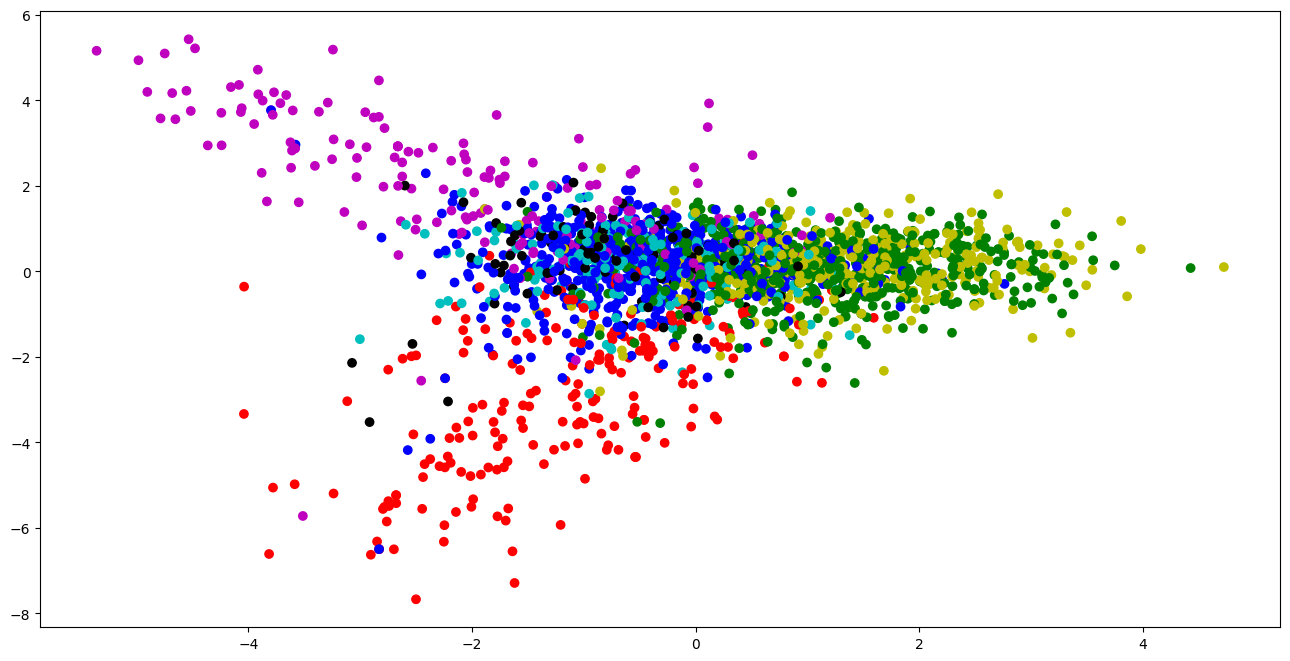

In [46]:
plt.figure(figsize=(16,8))
plt.scatter(X_reduced['x'], X_reduced['y'], color=X_reduced['color'])

Podemos observar que de la masa solo queda el rojo, que es categoría 0: animales. El verde (categoría 1: familia) y el amarillo (cat 5: sexo) son similares. Y el resto es un desastre.

¡Gracias por unirte a este taller!